In [3]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [ ]:
def find_face1 (x1,y1,stu):
    
    maxx = 0.0
    maxy = 0.0
    sdnt = ''
    flag = 0
    
    for s in stu:
        temp1 = norm.pdf (x1, np.mean (stu [s] ['x1']), stu [s]['sd'])
        temp2 = norm.pdf (y1 ,np.mean (stu [s] ['y1']), stu [s]['sd'])
        if (temp1 > maxx and temp1 > 0.00000001):
            maxx = temp1
            if(temp2 > maxy and temp2 > 0.00000001):
                maxy = temp2
                sdnt = s
                flag = 1
            
    if (flag == 0):
        stu [len (stu) + 1] = {'x1': [x1],'y1':[y1], 'df':pd.DataFrame (), 'sd': 10}
        return (len (stu), stu)
    
    stu [sdnt] ['x1'].append (x1)
    stu [sdnt] ['y1'].append (y1)
    return (sdnt, stu)

In [2]:
def find_face2 (x1, y1 , stu):
    
    max = 0.0
    sdnt = ''
    flag = 0
    
    for s in stu:
        temp = norm.pdf (x1, np.mean (stu [s] ['x1']), stu [s]['sd'])
        if (temp > max and temp > 0.00000001):
            max = temp
            sdnt = s
            flag = 1
            
    if (flag == 0):
        stu [len (stu) + 1] = {'x1': [x1],'y1':[y1], 'df':pd.DataFrame (), 'sd': 10}
        return (len (stu), stu)
    
    stu [sdnt] ['x1'].append (x1)
     stu [sdnt] ['y1'].append (y1)
    return (sdnt, stu)

In [8]:
df = pd.DataFrame()
students = {}


cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

for i in range(300):
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    
    for face in faces:
        
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
        
        #f, students = find_face (x1, x2, students)
        #f, students = find_face1(x1, y1, students)
        f, students = find_face2(x1, y1, students)
        
        landmarks = predictor(gray, face)
        xc = []
        yc = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            xc.append(x)
            yc.append(y)
            cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)
            
        students [f] ['df'] ['x'+str(i)] = xc
        students [f] ['df'] ['y'+str(i)] = yc
        students [f] ['box'] = list ((x1, x2))
    
    cv2.imshow("Frame", frame)
    

    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release ()
cv2.destroyAllWindows ()

In [ ]:
cap = cv2.VideoCapture(0)

for i in range (50):
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.rectangle (frame, (100, 100), (300, 350), (0, 255, 0), 3)
    cv2.imshow("Frame", frame)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
    
cap.release ()
cv2.destroyAllWindows ()

In [ ]:
def scaling:
    

In [9]:
len (students)

3

In [4]:
cap.release ()
cv2.destroyAllWindows ()

In [ ]:
students

In [14]:
for s in students:
    
    print (students [s] ['box'])

[194, 344]
[517, 589]
[228, 377]


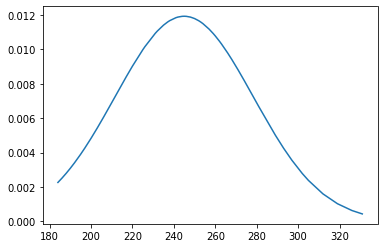

33.45463710603796
0.45516513069439396


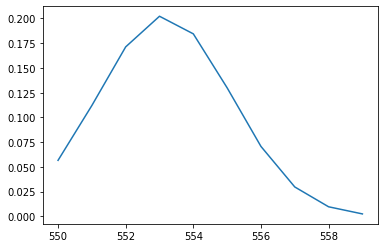

1.967093174091038
0.43713181646467514


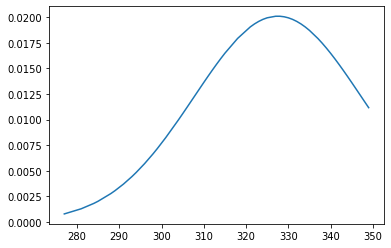

19.836965644360895
0.5510268234544693


In [10]:
for s in students:
    
    nt = students [s] ['df'].values [33].tolist()
    ntx = nt [0::2]
    ntx.sort()
    mean = np.mean (ntx)
    sigma = np.std (ntx)
    sigmanorm = np.std(ntx)/abs(students [s]['box'][1] - students[s]['box'][0])
    #plt.ylim ((0, 1))
    plt.plot (ntx, norm.pdf (ntx, mean, sigma))
    plt.show ()
    print (sigma)
    sigma = (sigma / (ntx [-1] - ntx [0]))*2
    print (sigma)

In [ ]:
cap.release ()
cv2.destroyAllWindows ()

In [ ]:
norm.pdf (350, 450, 15)

In [ ]:
students [1] ['df']